
## Técnicas de agrupamiento - Clustering


Hay dos grupos de técnicas de agrupamientos, las jerárquicas y las no
jerárquicas.

En las jerárquicas se genera una estructura de árbol. En la raiz de este árbol
se tiene un único grupo que contiene a todos lo elementos. Este grupo se divide
en dos subgrupos (o ramas), las cuales se siguen dividiendo hasta llegar a
grupos terminales de un solo individuo (hojas).

En las no jerárquicas suele partirse de de los elementos separados y en pasos
iterativos se toman elementos y se genera un nuevo grupo o se une a un grupo
existente.



### Agrupamiento jerarquico

Primero se calcular una matriz de distancias entre los elementos que quiero
agrupar.

En el ejemplo, estamos calculando distancias euclideas, pero podemos usar otra
medida de distancia. La medida que usemos va a afectar el resultado.

También es recomendable normalizar los datos antes de calcular las distancias.


Luego se agrupan los elementos más cercanos entre de acuerdo a algún tipo de
criterio de unión ( o "linkage").

- single: distancia mínima entre dos grupos.
- average: distancia de los promedios de cada grupo.
- complete: distancia máxima entre dos grupos.
- ward: minimiza la varianza de los grupos.

El agrupamiento es de "abajo hacía arriba" uniendo pares de grupos hasta que no
haya más que un solo grupo.

In [14]:
import sklearn.datasets as datasets
from scipy.spatial import distance_matrix

irisdf = datasets.load_iris(as_frame=True)

iris_distances = distance_matrix(irisdf["data"], irisdf["data"])
iris_distances

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

In [193]:
from sklearn.cluster import AgglomerativeClustering

cl = AgglomerativeClustering(
  n_clusters=None,
  distance_threshold=1.8,
  linkage="average",
  affinity="precomputed"
)

fitted = cl.fit(iris_distances)

In [194]:
print("Cantidad de clusters:", fitted.n_clusters_)
print(fitted.labels_)

Cantidad de clusters: 3
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


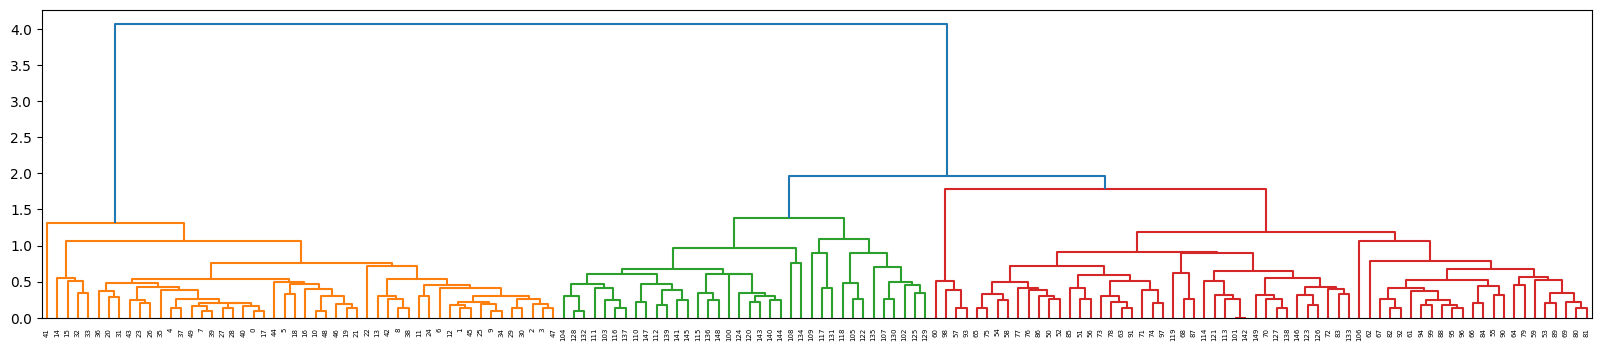

In [195]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

fig = plt.figure(figsize=(20, 4))
stacked = np.column_stack(
  [fitted.children_, fitted.distances_, np.zeros(fitted.distances_.shape)]
)
_ = dendrogram(stacked, color_threshold=1.8)

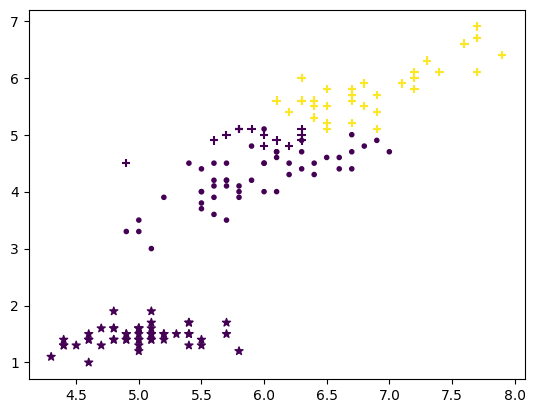

In [196]:
import matplotlib.pyplot as plt

marks = ["*", ".", "+"]

irisdf["data"]["fitted_label"] = fitted.labels_
irisdf["data"]["target"] = irisdf["target"]
for target in range(3):
  cdf = irisdf["data"].query("target==@target")
  plt.scatter(
    cdf["sepal length (cm)"],
    cdf["petal length (cm)"],
    c = cdf["fitted_label"],
    marker = marks[target]
  )



### Agrupamiento no jerarquico

Como ejemplo de agrupamiento no jerárquico vamos a ver kmeans.

El método de clustering K-means es un algoritmo utilizado para agrupar datos en
clusters basándose en sus similitudes.

- Inicialización:
  - Selecciona el número de clusters que se desea obtener.
  - Inicializa los centroides.
- Asignación de puntos a clusters:
  -  Calcula la distancia entre cada punto de datos y los centroides.
  - Asigna cada punto al cluster representado por el centroide más cercano.
- Actualización de centroides:
  - Calcula el nuevo centroide de cada cluster.

El algoritmo de K-means busca minimizar la suma de las distancias cuadradas
entre cada punto y su centroide asignado, lo cual se conoce como la función de
costo o inercia del modelo.


In [197]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans_fitted = kmeans.fit(irisdf["data"].iloc[:, :4])


In [198]:
kmeans_fitted.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

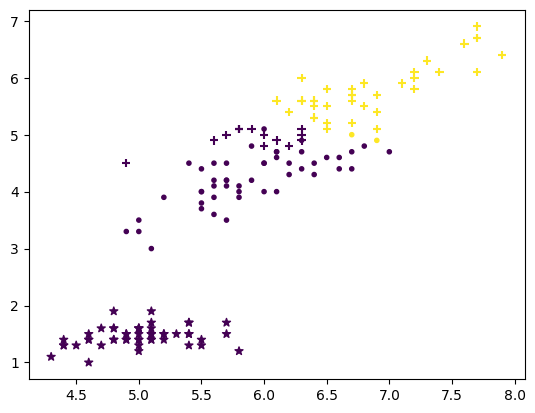

In [199]:
import matplotlib.pyplot as plt

marks = ["*", ".", "+"]

irisdf["data"]["fitted_label"] = kmeans_fitted.labels_
irisdf["data"]["target"] = irisdf["target"]
for target in range(3):
  cdf = irisdf["data"].query("target==@target")
  plt.scatter(
    cdf["sepal length (cm)"],
    cdf["petal length (cm)"],
    c = cdf["fitted_label"],
    marker = marks[target]
  )
